In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [66]:
data_directory = "data"

data_files = [
    "a05.txt",
    "a10.txt",
    "a17.txt",
    "a20.txt",
    "a22.txt",
    "e05.txt",
    "e10.txt",
    "e17.txt",
    "e20.txt",
    "e22.txt",
    "k05.txt",
    "k10.txt",
    "k17.txt",
    "k20.txt",
    "k22.txt",
    "w05.txt",
    "w10.txt",
    "w17.txt",
    "w20.txt",
    "w22.txt",
]

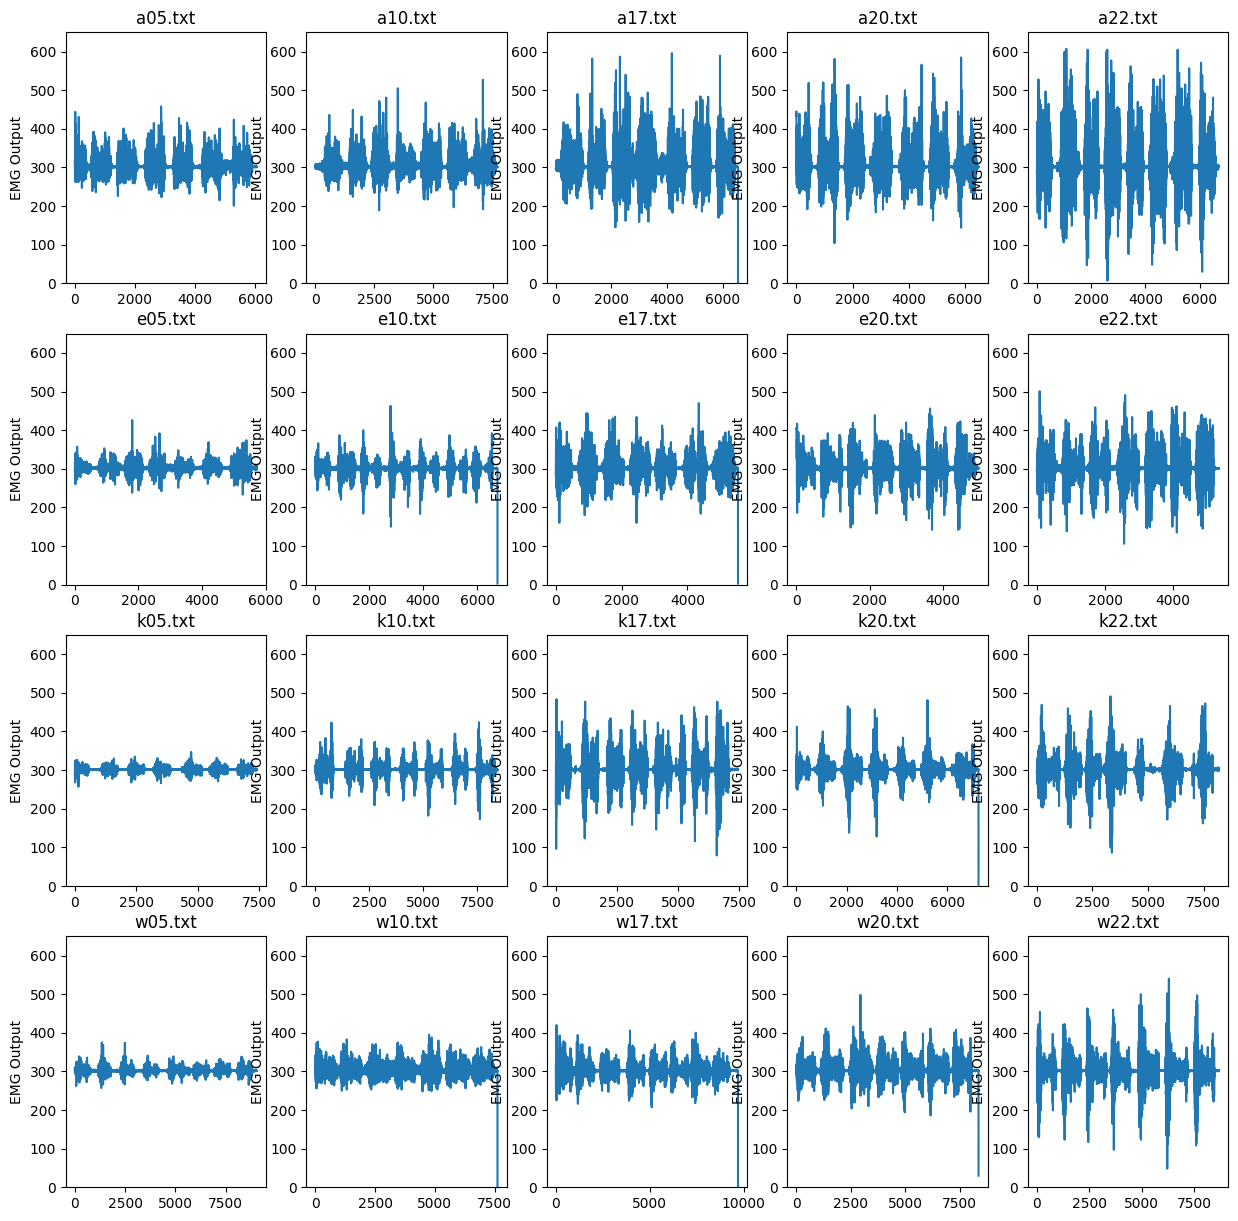

In [28]:
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(15, 15))
for ax, file in zip(axs.flatten(), data_files):
    position = np.loadtxt(os.path.join(data_directory, file))
    ax.set_title(file)
    ax.set_ylabel("EMG Output")
    ax.set_ylim((0, 650))
    ax.plot(position)
plt.show()

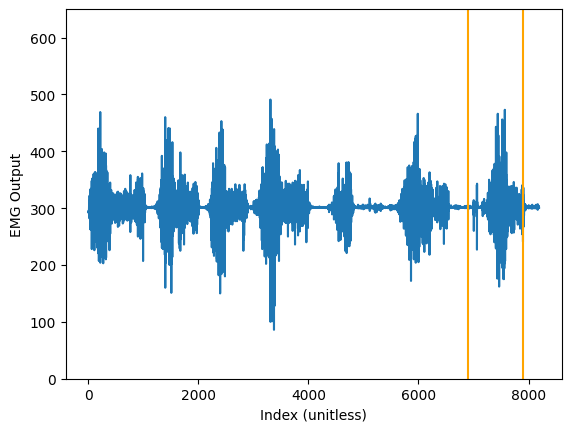

In [110]:
YMIN = 0
YMAX = 650

ax = plt.gca()
ax.set_xlabel("Index (unitless)")
ax.set_ylim((YMIN, YMAX))
ax.set_ylabel("EMG Output")

data = np.loadtxt("data/k22.txt")
plt.plot(data)
plt.vlines([6900, 7900], YMIN, YMAX, colors="orange")

plt.show()

In [89]:
w_data_files = [
    "w05.txt",
    "w10.txt",
    "w17.txt",
    "w20.txt",
    "w22.txt",
]

w_ranges = [
    # w05
    (0, 900),
    (1000, 2000),
    (2100, 3100),
    (3300, 4300),
    (4500, 5500),
    (5700, 6700),
    (6900, 7700),
    # w10
    (0, 900),
    (1000, 2000),
    (2100, 3100),
    (3200, 4200),
    (4300, 5300),
    (5400, 6400),
    (6500, 7500),
    # w17
    (0, 800),
    (1000, 1900),
    (2300, 3300),
    (3700, 4800),
    (4900, 6000),
    (6100, 7000),
    (7200, 8200),
    # w20
    (0, 600),
    (1200, 2000),
    (2500, 3500),
    (3700, 4300),
    (4800, 5900),
    (6000, 7000),
    (7100, 8100),
    # w22
    (0, 800),
    (1100, 2100),
    (2300, 3000),
    (3500, 4000),
    (4700, 5500),
    (6000, 6500),
    (7500, 8500),
]

In [111]:
k_data_files = [
    "k05.txt",
    "k10.txt",
    "k17.txt",
    "k20.txt",
    "k22.txt",
]

k_ranges = [
    # k05
    (0, 600),
    (1100, 1800),
    (2150, 2850),
    (3200, 3900),
    (4300, 5200),
    (5450, 6250),
    (6600, 7300),
    # k10
    (0, 850),
    (1400, 2200),
    (2600, 3450),
    (3900, 4700),
    (5100, 5900),
    (6300, 7100),
    (7400, 8400),
    # k17
    (0, 600),
    (1050, 1800),
    (2050, 2800),
    (3000, 3750),
    (4000, 4750),
    (5500, 6250),
    (6500, 7100),
    # k20
    (0, 600),
    (800, 1500),
    (1800, 2600),
    (2900, 3600),
    (3900, 4700),
    (5000, 5900),
    (6200, 7100),
    # k22
    (0, 1000),
    (1200, 2000),
    (2150, 2900),
    (3000, 4000),
    (4300, 4900),
    (5600, 6600),
    (6900, 7900),
]

In [94]:
e_data_files = [
    "e05.txt",
    "e10.txt",
    "e17.txt",
    "e20.txt",
    "e22.txt",
]

e_ranges = [
    # e05
    (0, 500),
    (800, 1300),
    (1600, 2100),
    (2300, 2800),
    (3200, 3700),
    (4000, 4600),
    (5000, 5500),
    # e10
    (0, 500),
    (800, 1500),
    (1700, 2400),
    (2700, 3500),
    (3800, 4600),
    (4800, 5700),
    (5800, 6700),
    # e17
    (0, 500),
    (700, 1300),
    (1400, 2100),
    (2300, 2800),
    (3000, 3700),
    (3900, 4600),
    (4800, 5400),
    # e20
    (0, 500),
    (700, 1300),
    (1400, 1900),
    (2100, 2600),
    (2800, 3400),
    (3600, 4100),
    (4300, 4900),
    # e22
    (0, 500),
    (800, 1400),
    (1600, 2100),
    (2300, 3000),
    (3200, 3800),
    (3900, 4550),
    (4650, 5200),
]

In [122]:
def plot_central_tendencies(ax, ranges, data_files, name):
    range_it = iter(ranges)
    mean_maximums = []
    median_maximums = []
    for file in data_files:
        position = np.loadtxt(os.path.join(data_directory, file))
        maximums = []
        for _ in range(7):
            i_left, i_right = next(range_it)
            maximums.append(np.max(position[i_left:i_right]))
        mean_maximums.append(np.mean(maximums))
        median_maximums.append(np.median(maximums))

    weights = np.array([5, 10, 17.5, 20, 22.5])
    ax.set_title(name)
    ax.scatter(weights, mean_maximums, label="mean")
    ax.scatter(weights, median_maximums, label="median")
    ax.legend()

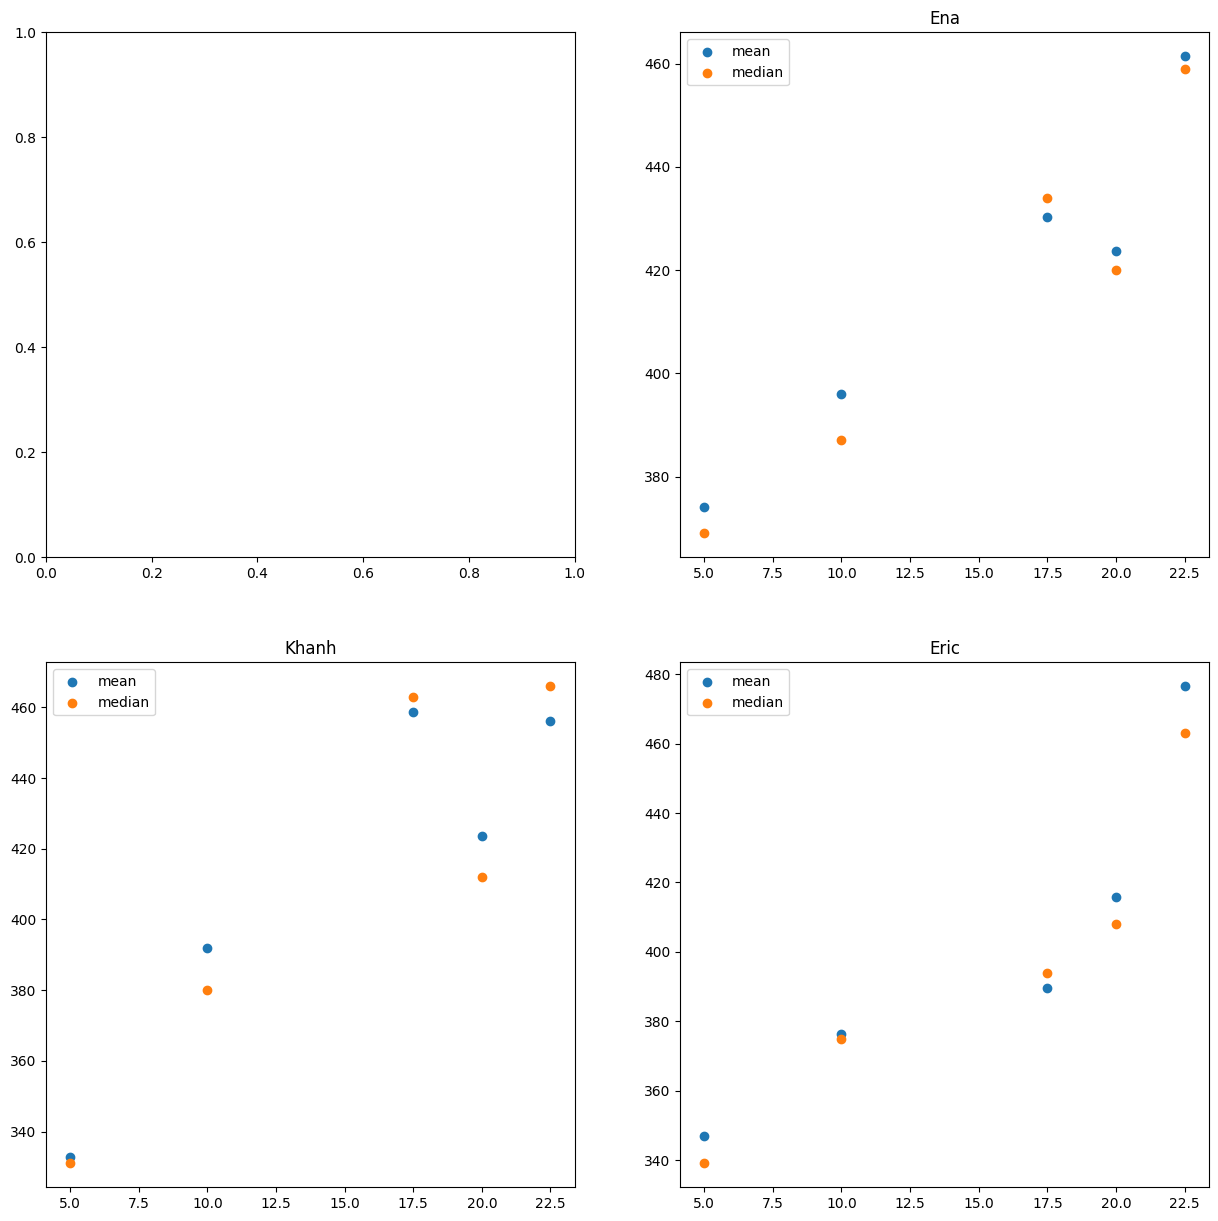

In [124]:
fig, ((ax_a, ax_e), (ax_k, ax_w)) = plt.subplots(2, 2, figsize=(15, 15))
plot_central_tendencies(ax_e, e_ranges, e_data_files, "Ena")
plot_central_tendencies(ax_k, k_ranges, k_data_files, "Khanh")
plot_central_tendencies(ax_w, w_ranges, w_data_files, "Eric")
plt.show()

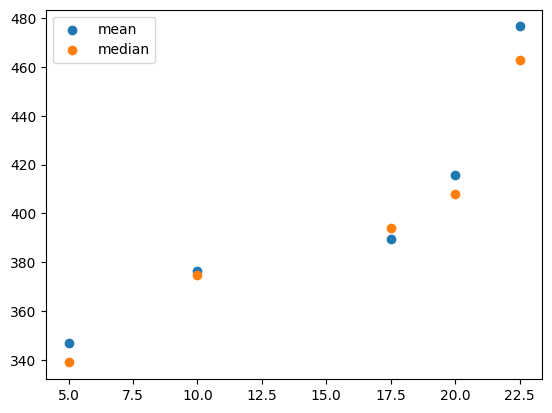

In [114]:
plot_central_tendencies(w_ranges, w_data_files)

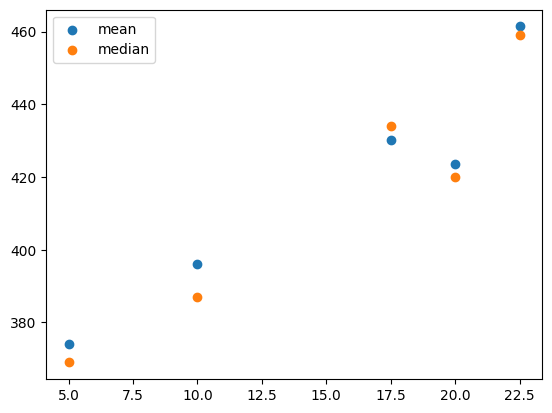

In [115]:
plot_central_tendencies(e_ranges, e_data_files)

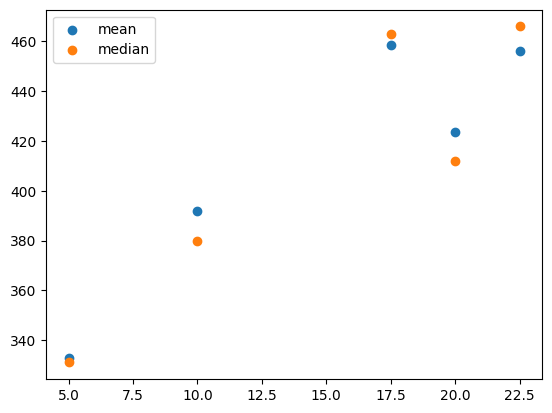

In [116]:
plot_central_tendencies(k_ranges, k_data_files)